In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import torch
from torch import nn
import numpy as np
from tqdm.auto import tqdm
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
device = torch.device('cuda')

In [3]:
x = torch.randn(100, requires_grad=True, device=device)
y = torch.randn(100, requires_grad=True, device=device)

In [4]:
opt = torch.optim.Adam([x, y], lr=1e-3)

In [5]:
def loss1():
    return x.pow(2).sum()

def loss2():
    return x.pow(2).sum()

# def loss():
#     return loss1() + loss2()

In [6]:
losses1 = []
losses2 = []
losses = []
coeffs1 = []
coeffs2 = []

In [7]:
np.random.rand()

0.07512941194887635

In [8]:
for i in tqdm(range(50000)):
    opt.zero_grad()
    l1 = loss1()
    l2 = loss2()
    
    coeff1 = 10 ** (np.random.rand() * 5 - 5)
    coeff2 = 10 ** (np.random.rand() * 5 - 5)
    
    l = coeff1 * l1 + coeff2 * l2
    l.backward()
    opt.step()
    
    losses1.append(l1.item())
    losses2.append(l2.item())
    losses.append(l.item())
    coeffs1.append(coeff1)
    coeffs2.append(coeff2)

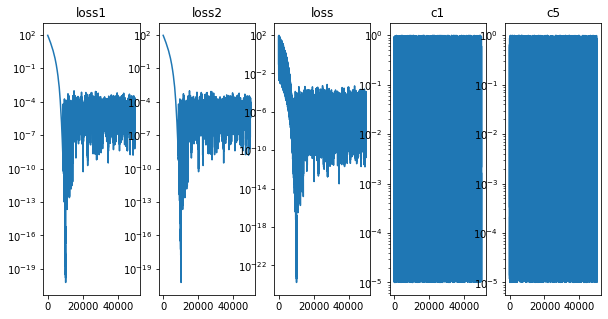

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 5, 1)
plt.title('loss1')
plt.plot(losses1)
plt.yscale('log')

plt.subplot(1, 5, 2)
plt.title('loss2')
plt.plot(losses2)
plt.yscale('log')

plt.subplot(1, 5, 3)
plt.title('loss')
plt.plot(losses)
plt.yscale('log')

plt.subplot(1, 5, 4)
plt.title('c1')
plt.plot(coeffs1)
plt.yscale('log')

plt.subplot(1, 5, 5)
plt.title('c5')
plt.plot(coeffs2)
plt.yscale('log')

- Worse than without coeff change. reducing momentum...

In [10]:
x = torch.randn(100, requires_grad=True, device=device)
y = torch.randn(100, requires_grad=True, device=device)

In [11]:
opt = torch.optim.Adam([x, y], lr=1e-3, betas=(0.5, 0.5))

In [12]:
def loss1():
    return x.pow(2).sum()

def loss2():
    return x.pow(2).sum()

# def loss():
#     return loss1() + loss2()

In [13]:
losses1 = []
losses2 = []
losses = []
coeffs1 = []
coeffs2 = []

In [14]:
np.random.rand()

0.9051577171943729

In [15]:
for i in tqdm(range(50000)):
    opt.zero_grad()
    l1 = loss1()
    l2 = loss2()
    
    coeff1 = 10 ** (np.random.rand() * 5 - 5)
    coeff2 = 10 ** (np.random.rand() * 5 - 5)
    
    l = coeff1 * l1 + coeff2 * l2
    l.backward()
    opt.step()
    
    losses1.append(l1.item())
    losses2.append(l2.item())
    losses.append(l.item())
    coeffs1.append(coeff1)
    coeffs2.append(coeff2)

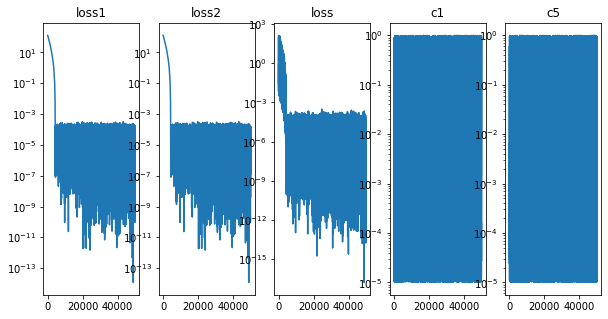

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 5, 1)
plt.title('loss1')
plt.plot(losses1)
plt.yscale('log')

plt.subplot(1, 5, 2)
plt.title('loss2')
plt.plot(losses2)
plt.yscale('log')

plt.subplot(1, 5, 3)
plt.title('loss')
plt.plot(losses)
plt.yscale('log')

plt.subplot(1, 5, 4)
plt.title('c1')
plt.plot(coeffs1)
plt.yscale('log')

plt.subplot(1, 5, 5)
plt.title('c5')
plt.plot(coeffs2)
plt.yscale('log')

- approximately the same
- trying related objectives (x-y) and (y)

In [25]:
device = torch.device('cuda')

In [33]:
x = torch.randn(100, requires_grad=True, device=device)
y = torch.randn(100, requires_grad=True, device=device)

In [34]:
opt = torch.optim.Adam([x, y], lr=1e-3)

In [35]:
def loss1():
    return (x - y).pow(2).sum()

def loss2():
    return x.pow(2).sum()

# def loss():
#     return loss1() + loss2()

In [36]:
losses1 = []
losses2 = []
losses = []
coeffs1 = []
coeffs2 = []

In [37]:
np.random.rand()

0.8310910868065706

In [38]:
for i in tqdm(range(50000)):
    opt.zero_grad()
    l1 = loss1()
    l2 = loss2()
    
    coeff1 = 10 ** (np.random.rand() * 5 - 5)
    coeff2 = 10 ** (np.random.rand() * 5 - 5)
    
    l = coeff1 * l1 + coeff2 * l2
    l.backward()
    opt.step()
    
    losses1.append(l1.item())
    losses2.append(l2.item())
    losses.append(l.item())
    coeffs1.append(coeff1)
    coeffs2.append(coeff2)

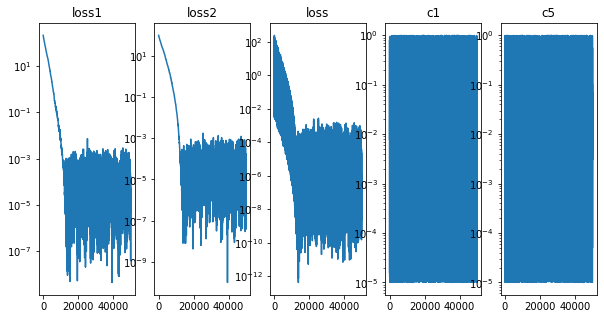

In [39]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 5, 1)
plt.title('loss1')
plt.plot(losses1)
plt.yscale('log')

plt.subplot(1, 5, 2)
plt.title('loss2')
plt.plot(losses2)
plt.yscale('log')

plt.subplot(1, 5, 3)
plt.title('loss')
plt.plot(losses)
plt.yscale('log')

plt.subplot(1, 5, 4)
plt.title('c1')
plt.plot(coeffs1)
plt.yscale('log')

plt.subplot(1, 5, 5)
plt.title('c5')
plt.plot(coeffs2)
plt.yscale('log')

- 1e-7 baseline (max)
- 1e-3 (with coeff)